## About Dataset 

A comprehensive dataset spanning 119 years (1901-2020) detailing rainfall records for each state in India. This dataset meticulously captures rainfall patterns, categorizing data by year and quarter. It offers an extensive overview of India's precipitation history, facilitating in-depth analyses and insights into regional and temporal rainfall variations across the country.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['figure.figsize']=10,6
from keras.layers.core import Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM
from keras.models import Sequential
import time
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import os
#print(os.listdir("../input"))



In [3]:
from google.colab import files
upload = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [2]:
dataset=pd.read_csv("C:/Users/Asswin/Desktop/1/Rainfall-Analysis/rainfall in india 1901-2015.csv")

In [3]:
dataset.dtypes

SUBDIVISION     object
YEAR             int64
JAN            float64
FEB            float64
MAR            float64
APR            float64
MAY            float64
JUN            float64
JUL            float64
AUG            float64
SEP            float64
OCT            float64
NOV            float64
DEC            float64
ANNUAL         float64
Jan-Feb        float64
Mar-May        float64
Jun-Sep        float64
Oct-Dec        float64
dtype: object

## Overall dataset

In [4]:
dataset.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [35]:
dataset['SUBDIVISION'].unique()

array(['ANDAMAN & NICOBAR ISLANDS', 'ARUNACHAL PRADESH',
       'ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL',
       'ORISSA', 'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH',
       'WEST UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA DELHI & CHANDIGARH',
       'PUNJAB', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'WEST RAJASTHAN',
       'EAST RAJASTHAN', 'WEST MADHYA PRADESH', 'EAST MADHYA PRADESH',
       'GUJARAT REGION', 'SAURASHTRA & KUTCH', 'KONKAN & GOA',
       'MADHYA MAHARASHTRA', 'MATATHWADA', 'VIDARBHA', 'CHHATTISGARH',
       'COASTAL ANDHRA PRADESH', 'TELANGANA', 'RAYALSEEMA', 'TAMIL NADU',
       'COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA',
       'SOUTH INTERIOR KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

### Dataset of Bihar

In [11]:
groups1 = dataset.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','NOV','DEC','Jan-Feb','Mar-May','Jun-Sep','Oct-Dec','ANNUAL']
data1=groups1.get_group(('BIHAR'))
data1.head()

C:\Users\Asswin\AppData\Local\Temp\ipykernel_16744\2778451161.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  groups1 = dataset.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','NOV','DEC','Jan-Feb','Mar-May','Jun-Sep','Oct-Dec','ANNUAL']


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,NOV,DEC,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,ANNUAL
897,1901,51.8,19.6,11.9,1.1,65.6,66.3,245.9,319.4,155.1,7.3,0.1,71.4,78.6,786.7,15.6,952.3
898,1902,4.6,0.7,24.3,17.3,66.3,118.2,361.0,225.5,358.7,1.1,0.0,5.2,107.9,1063.4,29.6,1206.2
899,1903,5.3,4.7,2.0,4.7,28.2,192.9,115.0,342.6,173.9,0.1,0.0,10.0,34.9,824.4,147.1,1016.3
900,1904,6.3,1.7,3.5,5.3,118.7,191.6,394.4,351.3,84.4,10.6,3.8,7.9,127.4,1021.8,112.4,1269.5
901,1905,16.0,30.1,32.6,21.4,77.5,50.5,409.1,495.3,353.9,0.0,0.6,46.1,131.4,1308.8,12.2,1498.5


Text(0.5, 1.0, 'Annual Rainfall in Bihar')

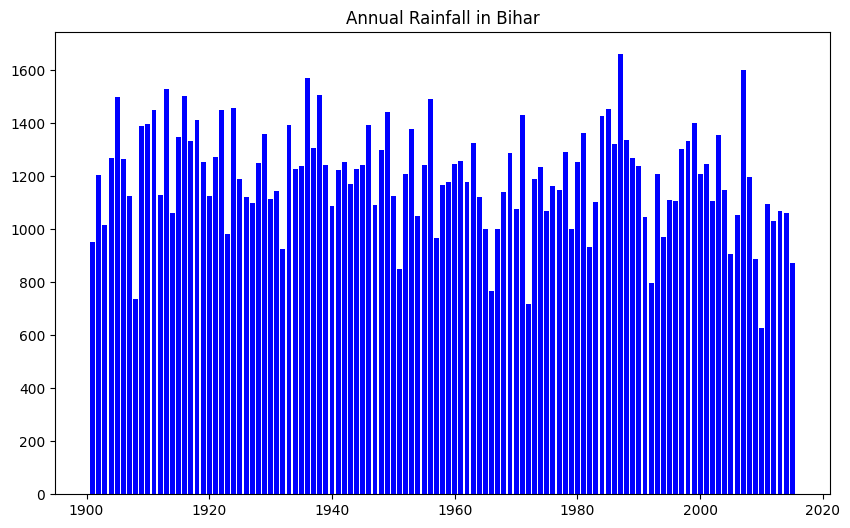

In [55]:
x = data1['YEAR']
y = data1['ANNUAL']
plt.bar(x,y,color='blue')
plt.title("Annual Rainfall in Bihar")

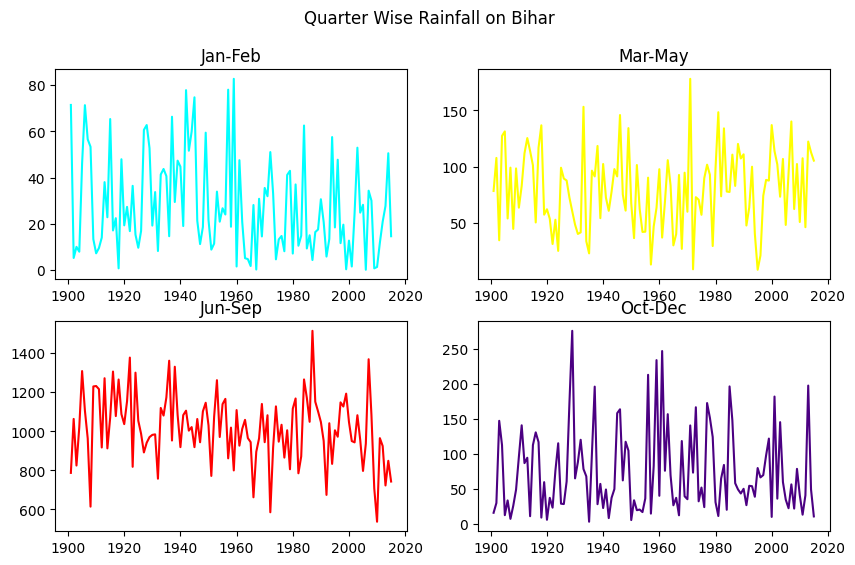

In [49]:
x = data1['YEAR']
y = data1['Jan-Feb']
y1 = data1['Mar-May']
y2 = data1['Jun-Sep']
y3 = data1['Oct-Dec']
plt.suptitle("Quarter Wise Rainfall on Bihar")
plt.subplot(2,2,1)
plt.title('Jan-Feb')
plt.plot(x,y,c = 'cyan')
plt.subplot(2,2,2)
plt.title('Mar-May')
plt.plot(x,y1,c = 'yellow')
plt.subplot(2,2,3)
plt.title('Jun-Sep')
plt.plot(x,y2,c = 'red')
plt.subplot(2,2,4)
plt.title('Oct-Dec')
plt.plot(x,y3,c = 'indigo')


In [56]:
groups = dataset.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','NOV','DEC']
data=groups.get_group(('BIHAR'))
data.head()

C:\Users\Asswin\AppData\Local\Temp\ipykernel_16744\2046732991.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  groups = dataset.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','NOV','DEC']


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,NOV,DEC
897,1901,51.8,19.6,11.9,1.1,65.6,66.3,245.9,319.4,155.1,7.3,0.1
898,1902,4.6,0.7,24.3,17.3,66.3,118.2,361.0,225.5,358.7,1.1,0.0
899,1903,5.3,4.7,2.0,4.7,28.2,192.9,115.0,342.6,173.9,0.1,0.0
900,1904,6.3,1.7,3.5,5.3,118.7,191.6,394.4,351.3,84.4,10.6,3.8
901,1905,16.0,30.1,32.6,21.4,77.5,50.5,409.1,495.3,353.9,0.0,0.6


In [57]:
data=data.melt(['YEAR']).reset_index()
data.head()

,index,YEAR,variable,value
0,0,1901,JAN,51.8
1,1,1902,JAN,4.6
2,2,1903,JAN,5.3
3,3,1904,JAN,6.3
4,4,1905,JAN,16.0


In [58]:
df= data[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
df.head()

,index,YEAR,variable,value
0,0,1901,JAN,51.8
115,115,1901,FEB,19.6
230,230,1901,MAR,11.9
345,345,1901,APR,1.1
460,460,1901,MAY,65.6


In [59]:
df.columns=['INDEX','YEAR','Month','avg_rainfall']

In [60]:
df.head()

,INDEX,YEAR,Month,avg_rainfall
0,0,1901,JAN,51.8
115,115,1901,FEB,19.6
230,230,1901,MAR,11.9
345,345,1901,APR,1.1
460,460,1901,MAY,65.6


In [61]:
d={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
df['Month']=df['Month'].map(d)
df.head(12)

,INDEX,YEAR,Month,avg_rainfall
0,0,1901,1,51.8
115,115,1901,2,19.6
230,230,1901,3,11.9
345,345,1901,4,1.1
460,460,1901,5,65.6
575,575,1901,6,66.3
690,690,1901,7,245.9
805,805,1901,8,319.4
920,920,1901,9,155.1
1035,1035,1901,11,7.3


In [62]:
df['Date']=pd.to_datetime(df.assign(Day=1).loc[:,['YEAR','Month','Day']])
df.head(12)

,INDEX,YEAR,Month,avg_rainfall,Date
0,0,1901,1,51.8,1901-01-01
115,115,1901,2,19.6,1901-02-01
230,230,1901,3,11.9,1901-03-01
345,345,1901,4,1.1,1901-04-01
460,460,1901,5,65.6,1901-05-01
575,575,1901,6,66.3,1901-06-01
690,690,1901,7,245.9,1901-07-01
805,805,1901,8,319.4,1901-08-01
920,920,1901,9,155.1,1901-09-01
1035,1035,1901,11,7.3,1901-11-01


In [63]:
cols=['avg_rainfall']
dataset=df[cols]
dataset.head()

,avg_rainfall
0,51.8
115,19.6
230,11.9
345,1.1
460,65.6


In [64]:
series=dataset
series.head()

,avg_rainfall
0,51.8
115,19.6
230,11.9
345,1.1
460,65.6


In [66]:
series.shape

(1265, 1)

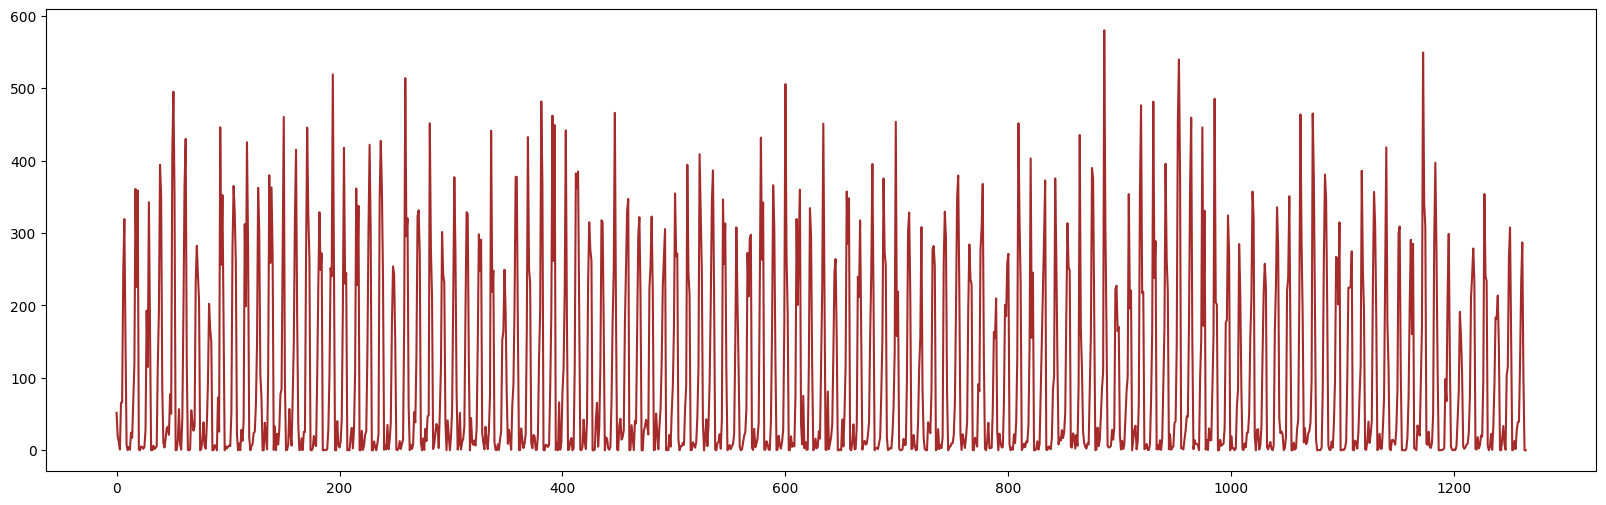

In [72]:
pyplot.figure(figsize=(20,6))
pyplot.plot(series.values,color = 'brown')
pyplot.show()

In [73]:
data_raw = series.values.astype("float32")

scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(data_raw)

dataset[0:5]

array([[0.08929496],
       [0.03378728],
       [0.02051371],
       [0.00189622],
       [0.11308396]], dtype=float32)

In [74]:
TRAIN_SIZE = 0.80

train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

Number of entries (training set, test set): (1012, 253)


In [75]:
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))

In [76]:
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

Original training data shape:
(1010, 1)
New training data shape:
(1010, 1, 1)


In [77]:
def fit_model(train_X, train_Y, window_size = 1):
    model = Sequential()
    
    model.add(LSTM(2000,activation = 'tanh', input_shape = (1, window_size)))
    model.add(Dropout(0.2))
    model.add(Dense(500))
    model.add(Dropout(0.4))
    model.add(Dense(500))
    model.add(Dropout(0.4))
    model.add(Dense(400))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation = 'linear'))
    model.compile(loss = "mean_squared_error", 
                  optimizer = "adam")
    model.fit(train_X, 
              train_Y, 
              epochs = 10, 
              batch_size = 64, 
              )
    
    return(model)

# Fit the first model.
model1 = fit_model(train_X, train_Y, window_size)

Epoch 1/10
16/16 [==============================] - 4s 141ms/step - loss: 0.0437
Epoch 2/10
16/16 [==============================] - 3s 157ms/step - loss: 0.0397
Epoch 3/10
16/16 [==============================] - 2s 153ms/step - loss: 0.0385
Epoch 4/10
16/16 [==============================] - 2s 156ms/step - loss: 0.0364
Epoch 5/10
16/16 [==============================] - 2s 148ms/step - loss: 0.0371
Epoch 6/10
16/16 [==============================] - 2s 144ms/step - loss: 0.0355
Epoch 7/10
16/16 [==============================] - 2s 144ms/step - loss: 0.0417
Epoch 8/10
16/16 [==============================] - 2s 148ms/step - loss: 0.0398
Epoch 9/10
16/16 [==============================] - 2s 144ms/step - loss: 0.0385
Epoch 10/10
16/16 [==============================] - 2s 144ms/step - loss: 0.0360


In [78]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2000)              16016000  
                                                                 
 dropout (Dropout)           (None, 2000)              0         
                                                                 
 dense (Dense)               (None, 500)               1000500   
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 400)               2

In [79]:
import math
def predict_and_score(model, X, Y):
    pred = scaler.inverse_transform(model.predict(X))

    orig_data = scaler.inverse_transform([Y])
   
    score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    return(score, pred)

rmse_train, train_predict = predict_and_score(model1, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model1, test_X, test_Y)

print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)

Training data score: 108.21 RMSE
Test data score: 96.43 RMSE


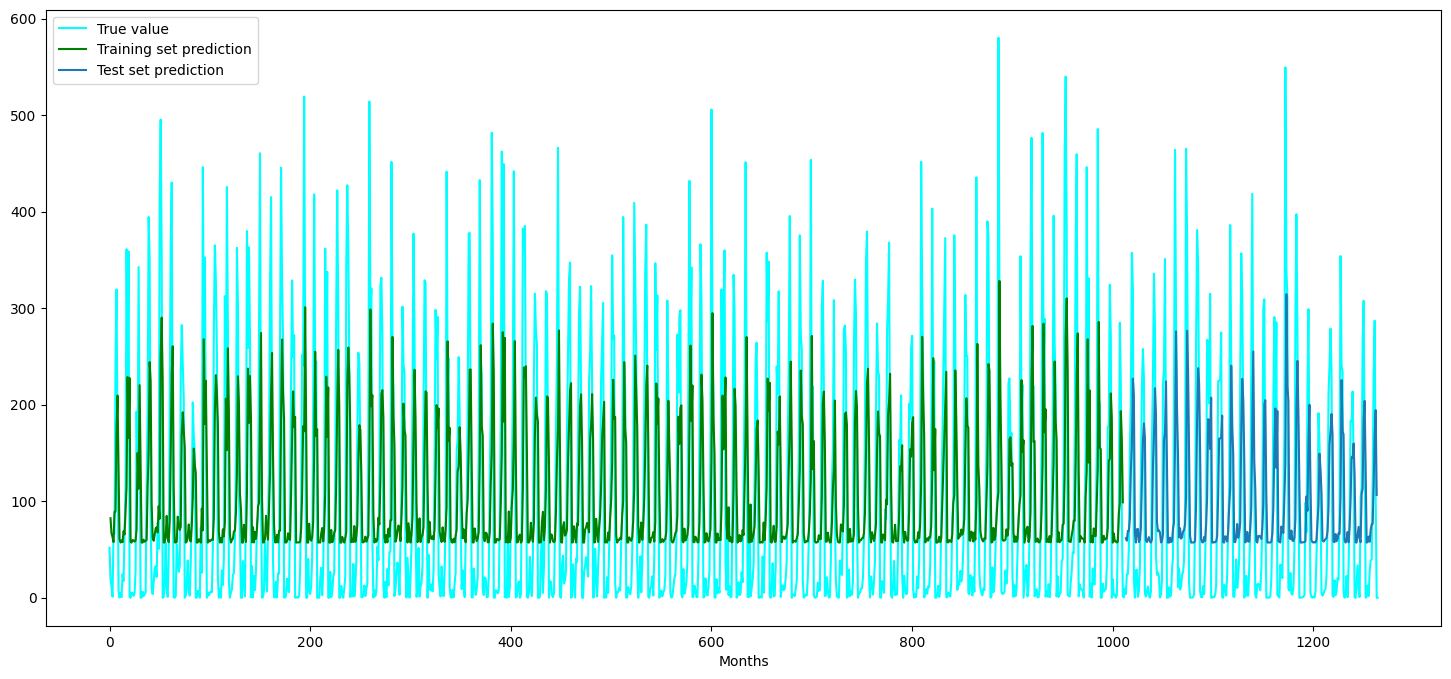

In [82]:
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict

test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict

plt.figure(figsize = (18, 8))
plt.plot(scaler.inverse_transform(dataset), label = "True value",color='cyan')
plt.plot(train_predict_plot, label = "Training set prediction",color='green')
plt.plot(test_predict_plot, label = "Test set prediction")
plt.xlabel("Months")

plt.legend()
plt.show()

In [83]:
test_predict

array([[ 61.705574],
       [ 59.070168],
       [ 69.06358 ],
       [ 69.06358 ],
       [ 81.984535],
       [131.86049 ],
       [157.66258 ],
       [226.98952 ],
       [209.69128 ],
       [ 66.5316  ],
       [ 57.165474],
       [ 70.912636],
       [ 71.30176 ],
       [ 57.605103],
       [ 60.534542],
       [ 73.05231 ],
       [120.435394],
       [161.72928 ],
       [180.52654 ],
       [165.88506 ],
       [ 59.265457],
       [ 57.70282 ],
       [ 60.43695 ],
       [ 62.778652],
       [ 58.093533],
       [ 57.165474],
       [ 60.388145],
       [135.7231  ],
       [166.35692 ],
       [216.98462 ],
       [190.60725 ],
       [ 78.73492 ],
       [ 68.72286 ],
       [ 69.793594],
       [ 67.70046 ],
       [ 57.214317],
       [ 58.581882],
       [ 65.995735],
       [162.86325 ],
       [171.54286 ],
       [224.02861 ],
       [135.53249 ],
       [ 57.11662 ],
       [ 57.11662 ],
       [ 62.242153],
       [ 57.65396 ],
       [ 58.533066],
       [ 71.3

In [84]:
train_predict

array([[ 82.32386 ],
       [ 66.67773 ],
       [ 62.924965],
       ...,
       [193.27419 ],
       [162.43806 ],
       [ 98.810074]], dtype=float32)